## 逻辑回归

`使用-sigmoid函数-进行对数几率回归(通常解决二分类问题)`

### 单特征

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict: [1 0]


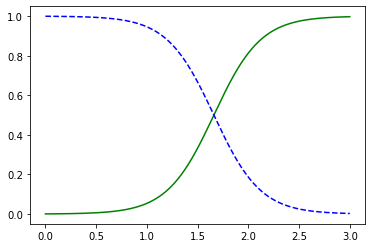

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
list(iris.keys())
X=iris["data"][:,3:] #petal width 花瓣宽度,选择每行的第四个(每行共四个)
print(iris["target"])
y=(iris["target"]==2).astype(np.int)#标签，数组元素为2则元素为1，否则为0

#训练一个逻辑回归模型
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()#创建实例
log_reg.fit(X,y)


X_new = np.linspace(0, 3, 1000).reshape(-1, 1)#生成0 - 3 的等差数列，数列有1000个元素
y_proba = log_reg.predict_proba(X_new)#得出预测概率数组
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")#是的概率
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")#不是的概率

#使用模型
print( "predict:",log_reg.predict([[1.7], [1.5]]))

# plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### 多特征

In [8]:
from sklearn.linear_model import LogisticRegression
#使用花两个数据，花的长度与宽度
X = iris["data"][:, (2, 3)] 
y = (iris["target"] == 2).astype(np.int)
print(y)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
#控制Scikit-Learn LogisticRegression模型的正则化强度的超参数不是alpha（与其他
#线性模型一样），而是反值C。C值越高，对模型的正则化越少。
log_reg.fit(X, y)
#生成随机测试集
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),#长度
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),#宽度
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict(X)
print(y_proba)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


`predict_proba返回的是一个n行k列的数组，第i行第j列上的数值是模型预测第i个预测样本的标签为j的概率。所以每一行的和应该等于1.`

## Softmax 回归

[[9.99996239e-01 3.76140758e-06 6.80030712e-20]
 [9.99995941e-01 4.05882856e-06 7.85729317e-20]
 [9.99995620e-01 4.37976703e-06 9.07856856e-20]
 ...
 [7.73770362e-23 1.03687990e-11 1.00000000e+00]
 [6.69680312e-23 9.68354416e-12 1.00000000e+00]
 [5.79592787e-23 9.04357657e-12 1.00000000e+00]]
[0 0 0 ... 2 2 2]


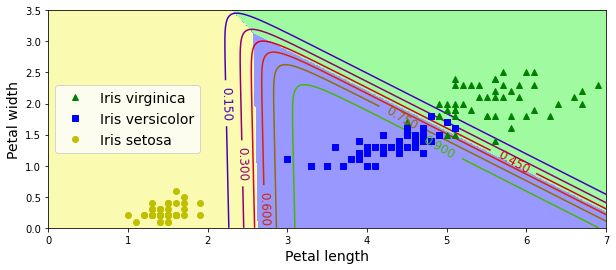

In [11]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
print(y_proba)
y_predict = softmax_reg.predict(X_new)
print(y_predict)


#下面为画图
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()